# Importation des librairies

In [64]:
import os, pandas as pd
import nltk
import numpy
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

# Importation data frames et nettoyage

In [75]:
DFnames = ["cheyenne", "newYork", "newportBay", "sequoiaLodge", "santaFe", "davyCrockettRanch"]

#Importation from csv
disney = pd.DataFrame(columns = ["Prenom","Note","Pays","Titre","Positif","Négatif","Date séjour","Date commentaire","hotel"])
for i in range(len(DFnames)): 
    nameDF = DFnames[i]
    DF = pd.read_csv("./data/"+nameDF+".csv", index_col=0)  
    DF["hotel"] = nameDF
    disney = pd.concat([disney, DF])
    globals()[nameDF] = DF



In [76]:
#Analyses
from nettoyage import nettoyage_corpus

#Filtre france en attendant
disney = disney[disney.Pays == "France"]
corpusTitre = disney.Titre.tolist()

#nettoyage des nan
corpusTitre = [str(i) for i in corpusTitre]

#Suppression des titres par défaut
listTitreDefaut = ["Mauvais","Médiocre","Assez médiocre", "Décevant", "Passable",
                   "Agréable", "Bien", "Très bien", "Fabuleux", "Exceptionnel"]
corpusTitre = [i for i in corpusTitre if not i in listTitreDefaut]

#Nettoyage global du corpus
corpusTitre = nettoyage_corpus(corpusTitre)

from gensim.models import Word2Vec
modele = Word2Vec(corpusTitre,vector_size=2,window=3,min_count=1)

#propriété "wv" -> wordvector
words = modele.wv


# Analyse Exploratoire 

In [77]:
type(modele)

#dimensionnalité
print(modele.vector_size)

2


In [78]:
#taille du voisinage
modele.window

#dimension de la représentation
words.vectors.shape


(1000, 2)

In [79]:
#affichage des termes de leur index
words.key_to_index

{'séjour': 0,
 'très': 1,
 'bon': 2,
 'bien': 3,
 'disney': 4,
 'super': 5,
 'agréable': 6,
 'hôtel': 7,
 'parfait': 8,
 'prix': 9,
 'top': 10,
 'famille': 11,
 'cher': 12,
 'rapport': 13,
 'magique': 14,
 'nan': 15,
 'nuit': 16,
 'superbe': 17,
 'personnel': 18,
 'parc': 19,
 'sympa': 20,
 'peu': 21,
 'chambre': 22,
 'qualité': 23,
 'plus': 24,
 'excellent': 25,
 'disneyland': 26,
 'trop': 27,
 'déçu': 28,
 'refaire': 29,
 'calme': 30,
 'moment': 31,
 'génial': 32,
 'hotel': 33,
 'sejour': 34,
 'déçue': 35,
 'piscine': 36,
 'nature': 37,
 'magnifique': 38,
 'tout': 39,
 'belle': 40,
 'bel': 41,
 'décevant': 42,
 'tres': 43,
 'déception': 44,
 'dommage': 45,
 'toujours': 46,
 'correct': 47,
 'sympathique': 48,
 'magie': 49,
 'booking': 50,
 'moyen': 51,
 'petit': 52,
 'pratique': 53,
 'recommande': 54,
 'logement': 55,
 'vraiment': 56,
 'cadre': 57,
 'qualitéprix': 58,
 'bonne': 59,
 'comme': 60,
 'passer': 61,
 'car': 62,
 'bungalow': 63,
 'dépaysant': 64,
 'propreté': 65,
 'sans': 66

In [80]:
#taille du dictionnaire
len(words.key_to_index)

1000

In [81]:
#les clés : les termes
words.key_to_index.keys()

dict_keys(['séjour', 'très', 'bon', 'bien', 'disney', 'super', 'agréable', 'hôtel', 'parfait', 'prix', 'top', 'famille', 'cher', 'rapport', 'magique', 'nan', 'nuit', 'superbe', 'personnel', 'parc', 'sympa', 'peu', 'chambre', 'qualité', 'plus', 'excellent', 'disneyland', 'trop', 'déçu', 'refaire', 'calme', 'moment', 'génial', 'hotel', 'sejour', 'déçue', 'piscine', 'nature', 'magnifique', 'tout', 'belle', 'bel', 'décevant', 'tres', 'déception', 'dommage', 'toujours', 'correct', 'sympathique', 'magie', 'booking', 'moyen', 'petit', 'pratique', 'recommande', 'logement', 'vraiment', 'cadre', 'qualitéprix', 'bonne', 'comme', 'passer', 'car', 'bungalow', 'dépaysant', 'propreté', 'sans', 'avon', 'beau', 'proche', 'cheyenne', 'weekend', 'mieux', 'beaucoup', 'lit', 'manque', 'sauf', 'cet', 'endroit', 'reviendrons', 'jamais', 'jours', 'quelques', 'non', 'prestations', 'davy', 'expérience', 'court', 'situé', 'confortable', 'réservation', 'enfants', 'merveilleux', 'faire', 'juste', 'literie', 'nest'

In [82]:
#similarité entre prix et cher
words.similarity("prix","cher")

0.3192052

In [83]:
#les termes les plus proches de "prix"
words.most_similar("prix",topn=5)

[('prolonger', 1.0),
 ('meme', 0.9999693036079407),
 ('garanti', 0.9999669790267944),
 ('compétent', 0.9999479055404663),
 ('davy', 0.9998234510421753)]

In [84]:
#les termes les plus proches de "améliorer" et "décevant"
words.most_similar("améliorer","décevant",topn=5)

[('suffisant', 0.9999718070030212),
 ('bucolique', 0.9999065399169922),
 ('chambre', 0.9998771548271179),
 ('magic', 0.9994613528251648),
 ('convenue', 0.9992833733558655)]

In [85]:
#les termes les plus proches de "douche"
words.most_similar("douche", topn=5)

[('reviendrons', 0.999963104724884),
 ('mieux', 0.9998329877853394),
 ('grandiose', 0.9998002052307129),
 ('inconfortable', 0.9996984004974365),
 ('fallait', 0.9996209144592285)]

In [86]:
words.most_similar("personnel",topn=5)

[('gamme', 0.9999994039535522),
 ('entrée', 0.9999992251396179),
 ('chère', 0.9999974966049194),
 ('superrrrrr', 0.9999966025352478),
 ('retournerai', 0.999995231628418)]

                  V1        V2
séjour      0.377534 -0.088939
très        0.631944  0.369165
bon        -0.265991 -0.398110
bien        0.628087  0.376461
disney      0.213592 -0.306055
...              ...       ...
rendezvous -0.031981  0.061412
coté       -0.409077  0.432982
usine      -0.442474 -0.486296
omg        -0.411357  0.361735
personnage  0.297864  0.457871

[1000 rows x 2 columns]


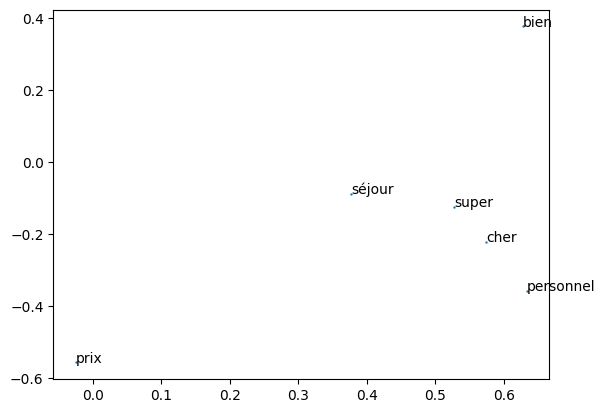

In [87]:
liste = ['séjour','personnel','prix','bien','super','cher']
words.doesnt_match(liste)

#data frame des coordonnées
import pandas
df = pandas.DataFrame(words.vectors,columns=['V1','V2'],index=words.key_to_index.keys())
print(df)

#sous-data frame corresp. aux termes à étudier
dfListe = df.loc[liste,:]
dfListe

#graphique dans le plan
import matplotlib.pyplot as plt
plt.scatter(dfListe.V1,dfListe.V2,s=0.5)
for i in range(dfListe.shape[0]):
    plt.annotate(dfListe.index[i],(dfListe.V1[i],dfListe.V2[i]))
plt.show()


# Clusters des mots les plus proches

In [88]:
#fonction pour transformer un document en vecteur
#à partir des tokens qui le composent
#entrée : doc à traiter
#         modèle entrainé ou préentrainé
#sortie : vecteur représentant le document
def my_doc_2_vec(doc,trained):
    #dimension de représentation
    p = trained.vectors.shape[1]
    #initialiser le vecteur
    vec = numpy.zeros(p)
    #nombre de tokens trouvés
    nb = 0
    #traitement de chaque token du document
    for tk in doc:
        #ne traiter que les tokens reconnus
        if ((tk in trained.key_to_index.keys()) == True):
            values = trained[tk]
            vec = vec + values
            nb = nb + 1.0
    #faire la moyenne des valeurs
    #uniquement si on a trouvé des tokens reconnus bien sûr
    if (nb > 0.0):
        vec = vec/nb
    #renvoyer le vecteur
    #si aucun token trouvé, on a un vecteur de valeurs nulles
    return vec


#fonction pour représenter un corpus à partir d'une représentation
#soit entraînée, soit pré-entraînée
#sortie : représentation matricielle
def my_corpora_2_vec(corpora,trained):
    docsVec = list()
    #pour chaque document du corpus nettoyé
    for doc in corpora:
        #calcul de son vecteur
        vec = my_doc_2_vec(doc,trained)
        #ajouter dans la liste
        docsVec.append(vec)
    #transformer en matrice numpy
    matVec = numpy.array(docsVec)
    return matVec

#CAH à partir de scipy
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

#pour transformation en MDT
from sklearn.feature_extraction.text import CountVectorizer


#fonction pour construire une typologie à partir
#d'une représentation des termes, qu'elle soit entraînée ou pré-entraînée
#seuil par défaut = 1, mais le but est d'avoir 4 groupes
#corpus ici se présente sous la forme d'une liste de listes de tokens
def my_cah_from_doc2vec(corpus,trained,seuil=1.0,nbTermes=7):

    #matrice doc2vec pour la représentation à 100 dim.
    #entraînée via word2vec sur les documents du corpus
    mat = my_corpora_2_vec(corpus,trained)

    #dimension
    #mat.shape

    #générer la matrice des liens
    Z = linkage(mat,method='ward',metric='euclidean')

    #affichage du dendrogramme
    plt.title("CAH")
    dendrogram(Z,orientation='left',color_threshold=0)
    plt.show()

    #affichage du dendrogramme avec le seuil
    plt.title("CAH")
    dendrogram(Z,orientation='left',color_threshold=seuil)
    plt.show()

    #découpage en 4 classes
    grCAH = fcluster(Z,t=seuil,criterion='distance')
    #print(grCAH)

    #comptage
    print(numpy.unique(grCAH,return_counts=True))

    #***************************
    #interprétation des clusters
    #***************************
    
    #parseur
    parseur = CountVectorizer(binary=True)
    
    #former corpus sous forme de liste de chaîne
    corpus_string = [" ".join(doc) for doc in corpus]
    
    #matrice MDT
    mdt = parseur.fit_transform(corpus_string).toarray()
    print("Dim. matrice documents-termes = {}".format(mdt.shape))
    
    #passer en revue les groupes
    for num_cluster in range(numpy.max(grCAH)):
        print("")
        #numéro du cluster à traiter
        print("Numero du cluster = {}".format(num_cluster+1))
        groupe = numpy.where(grCAH==num_cluster+1,1,0)
        effectifs = numpy.unique(groupe,return_counts=True)
        print("Effectifs = {}".format(effectifs[1][1]))
        #calcul de co-occurence
        cooc = numpy.apply_along_axis(func1d=lambda x: numpy.sum(x*groupe),axis=0,arr=mdt)
        #print(cooc)
        #création d'un data frame intermédiaire
        tmpDF = pandas.DataFrame(data=cooc,columns=['freq'],index=parseur.get_feature_names_out())    
        #affichage des "nbTermes" termes les plus fréquents
        print(tmpDF.sort_values(by='freq',ascending=False).iloc[:nbTermes,:])
        
    #renvoyer l'indicateur d'appartenance aux groupes
    return grCAH, mat

#*** fin de la fonction

In [89]:
#reconstruire la représentation ci-dessus, mais à 100 dim.
modeleBis = Word2Vec(corpusTitre,vector_size=100,window=3,min_count=1,epochs=100)
wordsBis = modeleBis.wv

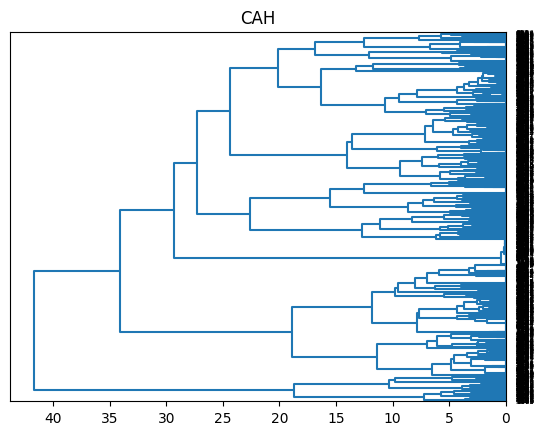

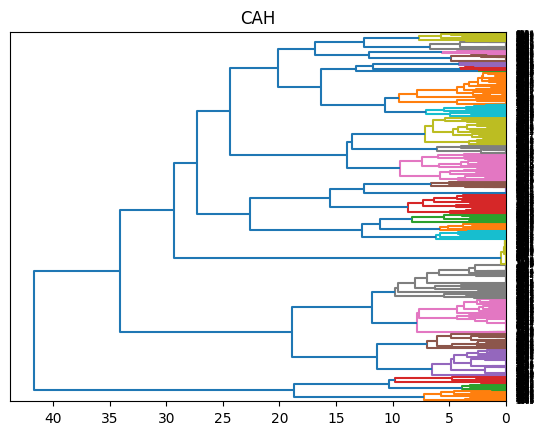

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int32), array([ 52,  32,  38, 122,  78, 158, 156, 115,  39,  40,  42,  92,  28,
        32, 127,  40, 133,  53, 152,   9,  18,  20,  37,  19,  39,  44],
      dtype=int64))
Dim. matrice documents-termes = (1715, 995)

Numero du cluster = 1
Effectifs = 52
             freq
cher           43
trop           27
beaucoup       10
prestations     9
rapport         7
peu             7
qualité         7

Numero du cluster = 2
Effectifs = 32
             freq
rapport        32
prix           19
qualité        17
très           15
qualitéprix    13
bon             8
mauvais         7

Numero du cluster = 3
Effectifs = 38
         freq
prix       20
déçu       13
mieux      12
faire       6
peu         5
chambre     5
qualité     5

Numero du cluster = 4
Effectifs = 122
         freq
bon       111
séjour     90
très       60
famille    12
bien       10
court       7
sejour

In [90]:
g1,mat1 = my_cah_from_doc2vec(corpusTitre,wordsBis,seuil=10)

# Analyse des topics les plus associés entre eux

In [91]:
from gensim import corpora

#dictionnaire de mots avec fréquence d'apparition
dictionary = corpora.Dictionary(corpusTitre)

# enlever les mots peu utilisés
dictionary.filter_extremes(no_below= 30, keep_n=1000)

#création du Corpus
corpusD = [dictionary.doc2bow(text) for text in corpusTitre]

In [92]:
import gensim
ldamodel = gensim.models.ldamodel.LdaModel(corpusD, num_topics = 3, id2word=dictionary, passes = 15)

In [93]:
topics = ldamodel.print_topics(num_words = 4)
print(topics)

#Ajouter des stopwords pour améliorer ? 

[(0, '0.130*"disney" + 0.126*"super" + 0.085*"prix" + 0.075*"bien"'), (1, '0.256*"bon" + 0.156*"séjour" + 0.119*"parfait" + 0.093*"famille"'), (2, '0.270*"très" + 0.239*"séjour" + 0.105*"agréable" + 0.070*"top"')]
